# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/src/data/rez_sample_04ALL/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Unnamed: 0,Branch,Option,Build Time,Binary Size
0,0,ix264-00001-00002,"['--disable-gpl', '--bit-depth=8', '--chroma-f...",38.6940,1938720
1,1,ix264-00001-00003,"['--disable-asm', '--disable-gpl', '--disable-...",34.4570,2278824
2,2,ix264-00001-00004,"['--disable-gpl', '--disable-interlaced', '--b...",70.3545,3047312
3,3,ix264-00001-00005,"['--disable-asm', '--disable-interlaced', '--b...",38.1065,2442528
4,4,ix264-00001-00006,"['--disable-interlaced', '--bit-depth=all', '-...",66.4115,2845544
...,...,...,...,...,...
375,375,ix264-00020-00015,"['--disable-asm', '--bit-depth=all', '--chroma...",33.4645,2223376
376,376,ix264-00020-00016,"['--disable-asm', '--disable-gpl', '--disable-...",18.2225,1554512
377,377,ix264-00020-00017,"['--disable-gpl', '--disable-win32thread', '--...",40.0620,2046072
378,378,ix264-00020-00018,"['--disable-asm', '--disable-gpl', '--disable-...",18.8360,1564568


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Unnamed: 0,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,0,ix264-00001-00002,"['--disable-gpl', '--bit-depth=8', '--chroma-f...",38.6940,1938720,ix264,00001,00002
1,1,ix264-00001-00003,"['--disable-asm', '--disable-gpl', '--disable-...",34.4570,2278824,ix264,00001,00003
2,2,ix264-00001-00004,"['--disable-gpl', '--disable-interlaced', '--b...",70.3545,3047312,ix264,00001,00004
3,3,ix264-00001-00005,"['--disable-asm', '--disable-interlaced', '--b...",38.1065,2442528,ix264,00001,00005
4,4,ix264-00001-00006,"['--disable-interlaced', '--bit-depth=all', '-...",66.4115,2845544,ix264,00001,00006
...,...,...,...,...,...,...,...,...
375,375,ix264-00020-00015,"['--disable-asm', '--bit-depth=all', '--chroma...",33.4645,2223376,ix264,00020,00015
376,376,ix264-00020-00016,"['--disable-asm', '--disable-gpl', '--disable-...",18.2225,1554512,ix264,00020,00016
377,377,ix264-00020-00017,"['--disable-gpl', '--disable-win32thread', '--...",40.0620,2046072,ix264,00020,00017
378,378,ix264-00020-00018,"['--disable-asm', '--disable-gpl', '--disable-...",18.8360,1564568,ix264,00020,00018


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN  37.9685  37.4195  37.5280  37.4935  37.4675  37.7220   
00002    38.6940      NaN  37.9440  37.8490  37.9590  37.9015  37.9925   
00003    34.4570  34.4690      NaN  33.9600  33.9265  33.9910  34.0990   
00004    70.3545  70.3660  70.3450      NaN  69.2780  69.3335  69.2925   
00005    38.1065  37.9545  37.9590  37.4090      NaN  37.4105  37.5475   
00006    66.4115  66.1530  66.1105  65.1955  65.4110      NaN  65.2080   
00007    21.2960  21.2575  21.0780  20.9565  21.0445  21.0340      NaN   
00008    20.7395  20.6995  20.3865  20.3360  20.3665  20.3645  20.4675   
00009    66.4735  66.3465  65.3510  65.5075  65.4085  65.4985  65.4670   
00010    32.2150  32.2005  32.2455  31.9050  31.7950  31.7895  31.7830   
00011    65.7790  65.6370  64.5770  64.8490  64.5855  64.7830  64.8970   
00012    37.8595  37.8260  37.7925  37.3145  37.3315  37.2920  37.4475   
00013    20.5855  20.6140  20.2750  20.3155  20.2535  20.3275  20.2805   
00014    17.9465  17.9300  17.9485  17.7110  17.7045  17.6675  17.6650   
00015    33.9320  33.8630  33.9200  33.4255  33.4275  33.4315  33.4785   
00016    18.4610  18.4260  18.2070  18.1745  18.1775  18.1965  18.2880   
00017    40.6165  40.6155  40.1085  40.0455  40.0070  40.0525  40.2515   
00018    19.0895  19.0230  18.7715  18.7550  18.8080  18.7625  18.8510   
00019    35.1345  34.9555  34.5020  34.5420  34.4990  34.4560  34.5970   
00020    38.0280  37.8075  37.7965  37.2910  37.3120  37.3120  37.3425   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001  37.5835  37.4960  37.5745  37.4955  37.4525  37.5615  37.6015  37.5095   
00002  37.8490  38.0170  37.9365  37.9175  37.8880  39.1445  37.9900  37.9565   
00003  34.0820  34.0190  34.1010  33.9260  34.0290  35.1105  34.1915  34.0630   
00004  69.2560  69.2405  69.3490  69.2480  69.2470  69.3990  69.4800  69.3305   
00005  37.4565  37.4365  37.5495  37.4405  37.4870  37.5365  38.4150  37.5585   
00006  65.3075  65.2330  65.3385  65.1845  65.2145  65.2830  66.2645  65.2895   
00007  21.0165  21.0325  21.0405  21.0075  21.0170  21.0340  21.0545  21.0460   
00008      NaN  20.3400  20.4570  20.3750  20.4295  20.4275  20.5060  20.4460   
00009  65.4210      NaN  65.5370  65.3980  65.4690  65.3625  65.6605  65.5650   
00010  31.8775  31.8460      NaN  31.8800  31.8880  31.8650  32.6570  31.8770   
00011  64.6250  64.6695  64.7085      NaN  64.6470  64.7750  64.7595  64.9100   
00012  37.2470  37.2845  37.3840  37.2930      NaN  37.3025  37.9240  37.2895   
00013  20.2895  20.3265  20.3215  20.2965  20.2705      NaN  20.3505  20.4125   
00014  17.7385  17.6795  17.7190  17.6740  17.6465  17.6725      NaN  17.7405   
00015  33.4510  33.4125  33.4860  33.3765  33.4355  33.5050  34.1745      NaN   
00016  18.1815  18.2225  18.2970  18.2125  18.2055  18.2515  18.3265  18.2400   
00017  39.9925  40.1480  40.0440  40.3515  40.0105  40.0445  40.2555  40.1280   
00018  18.7985  18.7655  18.8490  18.8090  18.7885  19.5650  18.9355  18.8140   
00019  34.5570  34.5380  34.5740  34.4925  34.5115  34.5885  34.7260  34.5960   
00020  37.2320  37.3080  37.4095  37.2270  37.2710  37.3680  38.3140  37.2630   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001  37.5140  37.5320  37.4845  37.5645  37.4855  
00002  37.8600  37.8655  37.8610  37.9415  37.9025  
00003  33.9780  34.0330  34.0260  34.0515  34.0030  
00004  69.3370  69.2355  69.3070  69.4195  69.3905  
00005  37.5130  37.5770  37.4490  37.4520  37.4910  
00006  65.2385 

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00003)"
00002,"(Build Time, 00004)"
00003,"(Build Time, 00011)"
00004,"(Build Time, 00017)"
00005,"(Build Time, 00004)"
00006,"(Build Time, 00011)"
00007,"(Build Time, 00004)"
00008,"(Build Time, 00020)"


In [6]:
# A detailed view of each executable's binary size after incremental built configurations
# Columns: Clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0   
00002   1938720.0        NaN  1938720.0  1938720.0  1938720.0  1938720.0   
00003   2278824.0  2278824.0        NaN  2278824.0  2278824.0  2278824.0   
00004   3047312.0  3047312.0  3047312.0        NaN  3047312.0  3047312.0   
00005   2442528.0  2442528.0  2442528.0  2442528.0        NaN  2442528.0   
00006   2845544.0  2845544.0  2845544.0  2845544.0  2845544.0        NaN   
00007   1601416.0  1601416.0  1601416.0  1601416.0  1601416.0  1601416.0   
00008   1657760.0  1657760.0  1657760.0  1657760.0  1657760.0  1657760.0   
00009   2836352.0  2836352.0  2836352.0  2836352.0  2836352.0  2836352.0   
00010   1749400.0  1749400.0  1749400.0  1749400.0  1749400.0  1749400.0   
00011   2838496.0  2838496.0  2838496.0  2838496.0  2838496.0  2838496.0   
00012   1914320.0  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0   
00013   1572712.0  1572712.0  1572712.0  1572712.0  1572712.0  1572712.0   
00014   1463912.0  1463912.0  1463912.0  1463912.0  1463912.0  1463912.0   
00015   2223376.0  2223376.0  2223376.0  2223376.0  2223376.0  2223376.0   
00016   1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00017   2046072.0  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0   
00018   1564568.0  1564568.0  1564568.0  1564568.0  1564568.0  1564568.0   
00019   2281776.0  2281776.0  2281776.0  2281776.0  2281776.0  2281776.0   
00020   1914320.0  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0   
00002  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0   
00003  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00004  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0   
00005  2442528.0  2442528.0  2442528.0  2442528.0  2442528.0  2442528.0   
00006  2845544.0  2845544.0  2845544.0  2845544.0  2845544.0  2845544.0   
00007        NaN  1601416.0  1601416.0  1601416.0  1601416.0  1601416.0   
00008  1657760.0        NaN  1657760.0  1657760.0  1657760.0  1657760.0   
00009  2836352.0  2836352.0        NaN  2836352.0  2836352.0  2836352.0   
00010  1749400.0  1749400.0  1749400.0        NaN  1749400.0  1749400.0   
00011  2838496.0  2838496.0  2838496.0  2838496.0        NaN  2838496.0   
00012  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0        NaN   
00013  1572712.0  1572712.0  1572712.0  1572712.0  1572712.0  1572712.0   
00014  1463912.0  1463912.0  1463912.0  1463912.0  1463912.0  1463912.0   
00015  2223376.0  2223376.0  2223376.0  2223376.0  2223376.0  2223376.0   
00016  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00017  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0   
00018  1564568.0  1564568.0  1564568.0  1564568.0  1564568.0  1564568.0   
00019  2281776.0  2281776.0  2281776.0  2281776.0  2281776.0  2281776.0   
00020  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0  1914320.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0  1913968.0   
00002  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0  1938720.0   
00003  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00004  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0  3047312.0   
00005 

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,37.9685,37.550211,37.4195
00002,39.1445,38.024711,37.8490
00003,35.1105,34.132421,33.9260
00004,70.3660,69.484684,69.2355
00005,38.4150,37.618368,37.4090
00006,66.4115,65.465711,65.1845
00007,21.2960,21.059474,20.9565
00008,20.7395,20.437789,20.3310


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00004,70.3660,69.484684,69.2355
00009,66.4735,65.563553,65.3510
00006,66.4115,65.465711,65.1845
00011,65.7790,64.838658,64.5770
00017,40.6165,40.156421,39.9925
00002,39.1445,38.024711,37.8490
00001,37.9685,37.550211,37.4195
00005,38.4150,37.618368,37.4090


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

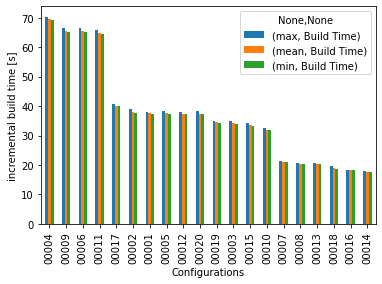

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

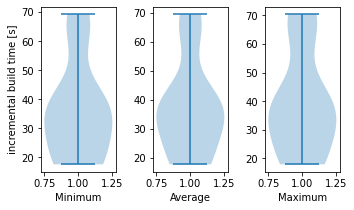

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a CSV file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,37.9685,37.4195,37.5280,37.4935,37.4675,37.7220,37.5835,37.4960,37.5745,37.4955,37.4525,37.5615,37.6015,37.5095,37.5140,37.5320,37.4845,37.5645,37.4855
00002,38.6940,NaN,37.9440,37.8490,37.9590,37.9015,37.9925,37.8490,38.0170,37.9365,37.9175,37.8880,39.1445,37.9900,37.9565,37.8600,37.8655,37.8610,37.9415,37.9025
00003,34.4570,34.4690,NaN,33.9600,33.9265,33.9910,34.0990,34.0820,34.0190,34.1010,33.9260,34.0290,35.1105,34.1915,34.0630,33.9780,34.0330,34.0260,34.0515,34.0030
00004,70.3545,70.3660,70.3450,NaN,69.2780,69.3335,69.2925,69.2560,69.2405,69.3490,69.2480,69.2470,69.3990,69.4800,69.3305,69.3370,69.2355,69.3070,69.4195,69.3905
00005,38.1065,37.9545,37.9590,37.4090,NaN,37.4105,37.5475,37.4565,37.4365,37.5495,37.4405,37.4870,37.5365,38.4150,37.5585,37.5130,37.5770,37.4490,37.4520,37.4910
00006,66.4115,66.1530,66.1105,65.1955,65.4110,NaN,65.2080,65.3075,65.2330,65.3385,65.1845,65.2145,65.2830,66.2645,65.2895,65.2385,65.2575,65.2810,65.2105,65.2565
00007,21.2960,21.2575,21.0780,20.9565,21.0445,21.0340,NaN,21.0165,21.0325,21.0405,21.0075,21.0170,21.0340,21.0545,21.0460,21.0465,21.0280,21.0155,21.0635,21.0615
00008,20.7395,20.6995,20.3865,20.3360,20.3665,20.3645,20.4675,NaN,20.3400,20.4570,20.3750,20.4295,20.4275,20.5060,20.4460,20.4065,20.3865,20.4120,20.4410,20.3310
00009,66.4735,66.3465,65.3510,65.5075,65.4085,65.4985,65.4670,65.4210,NaN,65.5370,65.3980,65.4690,65.3625,65.6605,65.5650,65.3870,65.4365,65.5460,65.4305,65.4420
